# Explore here

In [60]:
# Your code here
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [61]:
#guardar dataframe en data ../ para ir atras una carpeta
df.to_csv("../data/raw/df_airbnb_NY.csv", index=False)


In [62]:
df.shape

(48895, 16)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [64]:
#revisar duplicados

print(df["name"].duplicated().sum())
print(df["host_id"].duplicated().sum())
print(df["id"].duplicated().sum())

989
11438
0


In [65]:
df[df["name"].duplicated()].sort_values("name")
#hay nombres muy genericos y varios nan

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
34352,27237625,*NO GUEST SERVICE FEE* Luxury Midtown One Bedr...,205031545,Red Awning,Manhattan,Midtown,40.75459,-73.96707,Entire home/apt,737,3,3,2019-06-10,0.44,49,153
42817,33241978,1 BR Suite in Midtown Manhattan,24831061,Hosteeva,Manhattan,Midtown,40.76391,-73.98071,Private room,250,1,0,NaN,NaN,8,0
9250,7071657,1 BR UPPER EAST SIDE,4909308,Francesco,Manhattan,Upper East Side,40.77344,-73.95035,Entire home/apt,243,1,26,2019-06-22,1.10,1,149
37235,29587811,1 Bedroom in Williamsburg,162504107,Lucile,Brooklyn,Williamsburg,40.71526,-73.94987,Private room,90,2,2,2019-05-19,0.33,1,193
32000,24976971,1 bedroom apartment on Columbus Avenue,76104209,Rated,Manhattan,Upper West Side,40.79360,-73.96642,Entire home/apt,180,30,0,NaN,NaN,33,364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13401,10052289,NaN,49522403,Vanessa,Brooklyn,Brownsville,40.66409,-73.92314,Private room,50,3,3,2016-08-18,0.07,1,362
15819,12797684,NaN,69715276,Yan,Manhattan,Upper West Side,40.79843,-73.96404,Private room,100,1,0,NaN,NaN,2,0
16071,12988898,NaN,71552588,Andrea,Bronx,Fordham,40.86032,-73.88493,Shared room,130,1,0,NaN,NaN,1,365
18047,14135050,NaN,85288337,Jeff,Brooklyn,Bedford-Stuyvesant,40.69421,-73.93234,Private room,70,3,0,NaN,NaN,1,0


In [66]:
#eliminar informacion irrelevante, que no me entrega valor predictor, como identificadores

df.drop(["id", "name", "host_id", "last_review", "reviews_per_month"], axis=1, inplace=True)
df.head()

,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [67]:
#exploramos valores extremos para ver si conviene separar los datos para visualizar tendencias
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


In [68]:
#hay filas con precio cero. se eliminan
print(df.shape)
df = df[df["price"] > 0]
print(df.shape)

(48895, 11)
(48884, 11)


In [69]:
#hay 86 registros con valor por noche superior a 2000 dolares. 
#los separamos en una variable
high_price = df[df["price"] > 2000]

high_price.shape

(86, 11)

In [70]:
#eliminar las propiedades de lujo

print(df.shape)
df = df[df["price"] < 2000]
print(df.shape)

(48884, 11)
(48774, 11)


In [71]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,48774.000000,48774.000000,48774.000000,48774.000000,48774.000000,48774.000000,48774.000000
mean,40.728938,-73.952123,144.619961,6.990856,23.314594,7.153955,112.603559
std,0.054546,0.046165,133.741173,20.347468,44.589779,32.992279,131.533571
min,40.499790,-74.244420,10.000000,1.000000,0.000000,1.000000,0.000000
25%,40.690060,-73.983030,69.000000,1.000000,1.000000,1.000000,0.000000
50%,40.723040,-73.955650,105.000000,3.000000,5.000000,1.000000,45.000000
75%,40.763107,-73.936200,175.000000,5.000000,24.000000,2.000000,226.000000
max,40.913060,-73.712990,1999.000000,1250.000000,629.000000,327.000000,365.000000


In [72]:
#hay 731 registros con minimo de noches mayor a un mes. 
#los separamos en una variable
longer_min_stay = df[df["minimum_nights"] > 30]

longer_min_stay.shape

(731, 11)

In [74]:
#eliminar las propiedades con estadia minima mayor a un mes
print(df.shape)
df = df[df["minimum_nights"] < 30]
print(df.shape)

(48774, 11)
(44304, 11)


c:\Users\grazi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\grazi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\grazi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\grazi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Axes: xlabel='availability_365', ylabel='Count'>

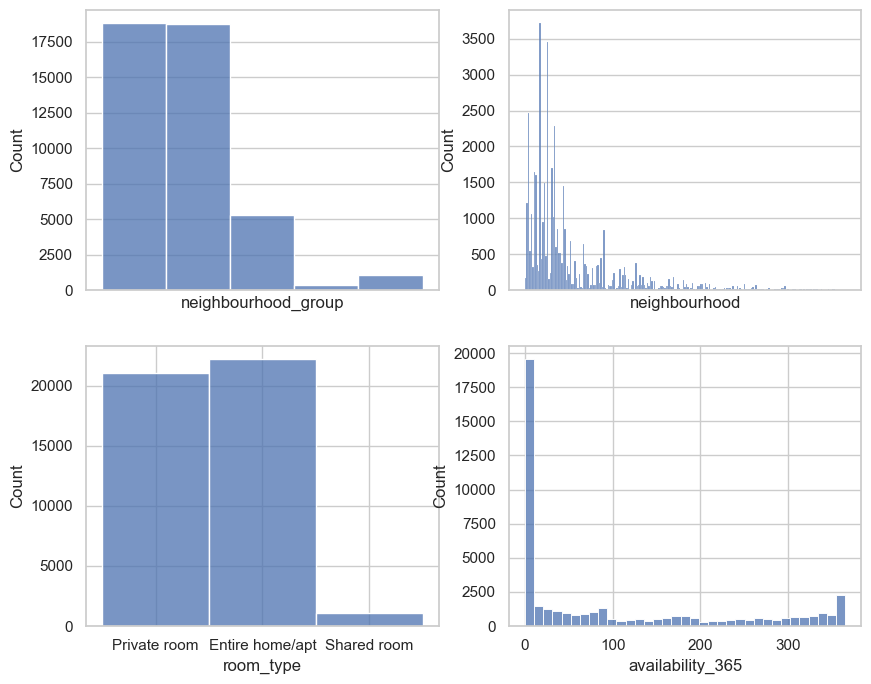

In [75]:
#analisis de variables univariantes
import matplotlib.pyplot as plt
import seaborn as sns

# categoricas. subplot figura y eje. grilla de graficos. 5 variables cat en df. deben ser numeros pares
# primero numero de columnas, luego de filas, luego de que tamaño de los graficos.

fig, axis = plt.subplots(2,2, figsize=(10,8))
#ax es el axis que recibimos de arriba y se le da la posicion
#luego la data, que es el df y luego x que es la variable cat
sns.histplot(ax=axis[0,0],data=df, x="neighbourhood_group").set_xticks([])
sns.histplot(ax=axis[0,1],data=df, x="neighbourhood").set_xticks([])
sns.histplot(ax=axis[1,0],data=df, x="room_type")
sns.histplot(ax=axis[1,1],data=df, x="availability_365")

c:\Users\grazi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\grazi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\grazi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\grazi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

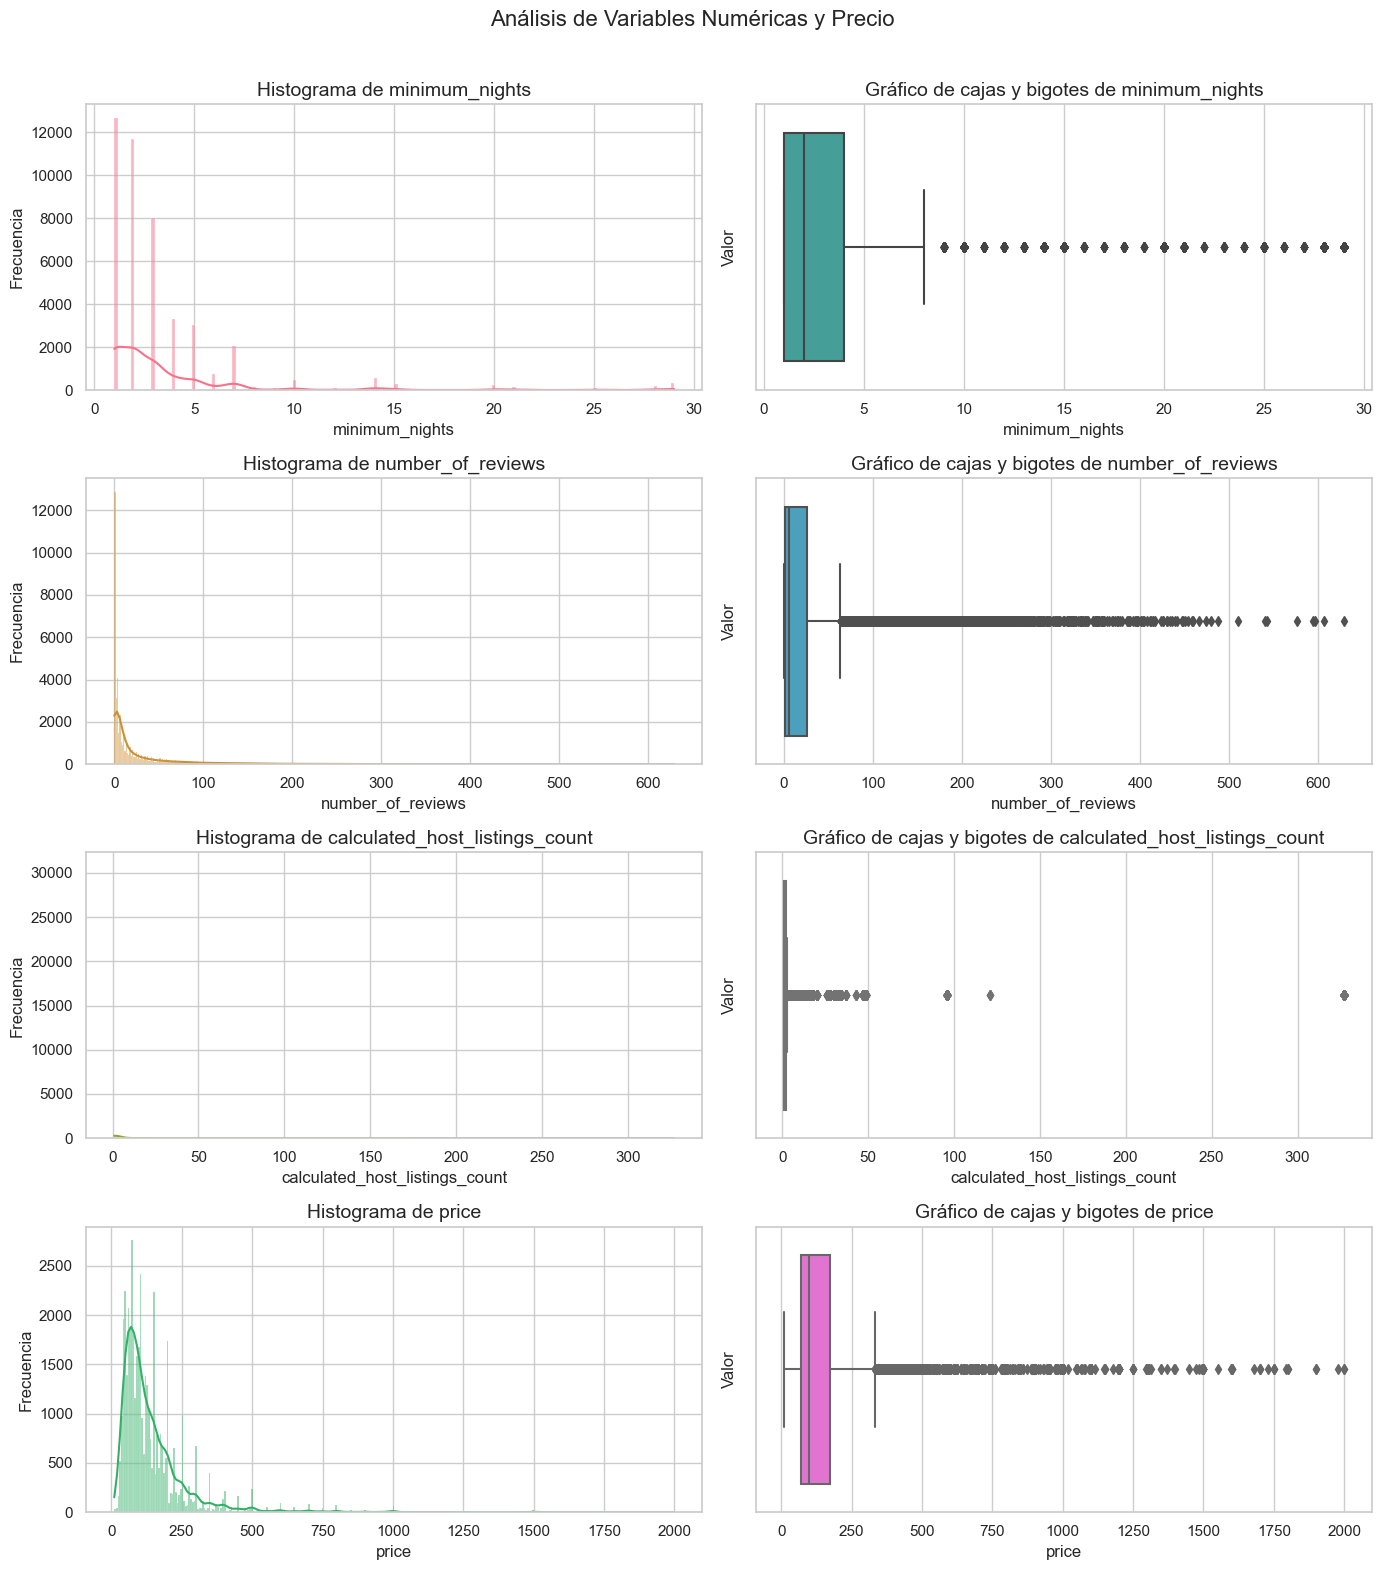

In [76]:
#analisis col numericas (numero de noches, numero de reviews y hostlistingcount) y la variable objetivo  (precio)
#4 variables, 4 graficos.
#como son numericas las variables, histograma en conjunto con cajas y bigotes
#8 subplots, 2 de cada variable.


# Configuración de estilo y paleta de colores
sns.set_theme(style="whitegrid")
palette = sns.color_palette("husl", 8)

# Configuración de la figura y los subplots
fig, axes = plt.subplots(4, 2, figsize=(14, 16))
fig.suptitle('Análisis de Variables Numéricas y Precio', fontsize=16)

# Lista de variables numéricas
variables = ['minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'price']

# Iterar sobre las variables para crear histogramas y gráficos de cajas y bigotes
for i, var in enumerate(variables):
    # Histograma
    sns.histplot(df[var], ax=axes[i, 0], kde=True, color=palette[i])
    axes[i, 0].set_title(f'Histograma de {var}', fontsize=14)
    axes[i, 0].set_xlabel(var, fontsize=12)
    axes[i, 0].set_ylabel('Frecuencia', fontsize=12)

    # Gráfico de cajas y bigotes
    sns.boxplot(x=df[var], ax=axes[i, 1], color=palette[i+4])
    axes[i, 1].set_title(f'Gráfico de cajas y bigotes de {var}', fontsize=14)
    axes[i, 1].set_xlabel(var, fontsize=12)
    axes[i, 1].set_ylabel('Valor', fontsize=12)

# Ajustar el layout para que no haya superposición de etiquetas
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

<Axes: >

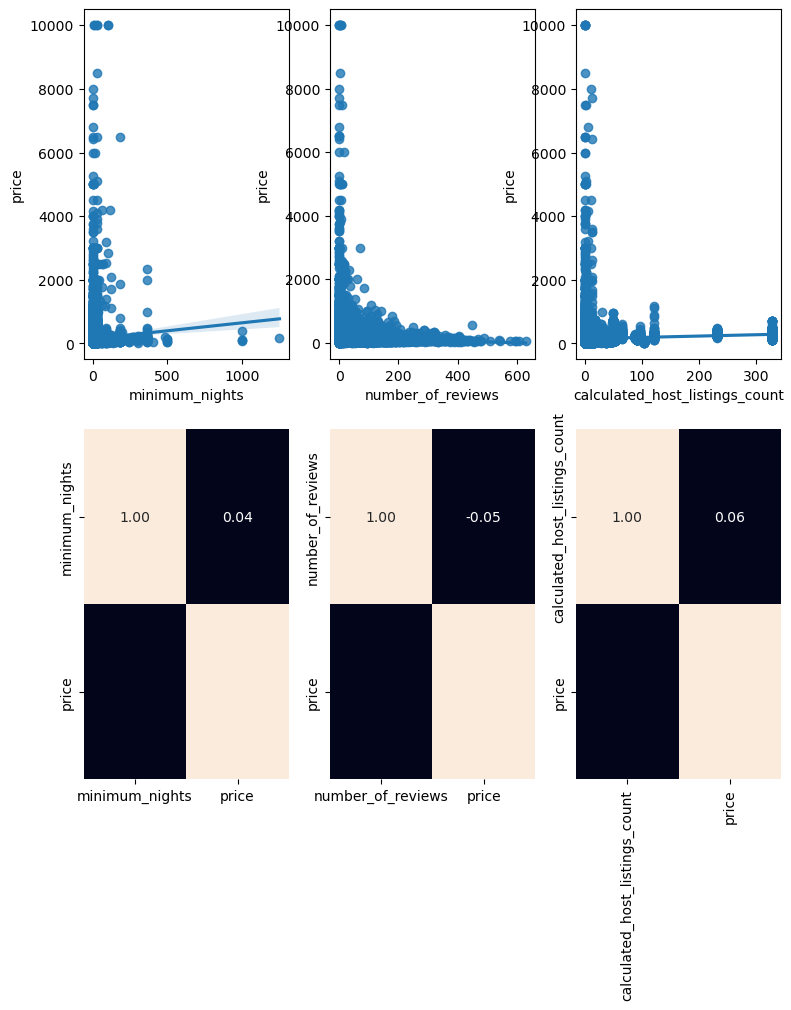

In [11]:
#Paso 4, análisis multivariante
#Numerico-numerico. Scatter y un mapa de relacion
#relaciono la variable objetivo (precio) con las no objetivo (min noches, numero de reseñas y numero de propiedades listadas por el host) 6 graficos.
#regplot es un grafico de dispersion mas linea de regresion
fig, axis = plt.subplots(2,3,figsize=(9,10))
sns.regplot(ax=axis[0,0],data=df,x="minimum_nights", y="price")
sns.heatmap(df[["minimum_nights","price"]].corr(),fmt=".2f",ax=axis[1,0],cbar=False,annot=True)

sns.regplot(ax=axis[0,1],data=df,x="number_of_reviews", y="price")
sns.heatmap(df[["number_of_reviews","price"]].corr(),fmt=".2f",ax=axis[1,1],cbar=False,annot=True)

sns.regplot(ax=axis[0,2],data=df,x="calculated_host_listings_count", y="price")
sns.heatmap(df[["calculated_host_listings_count","price"]].corr(),fmt=".2f",ax=axis[1,2],cbar=False,annot=True)

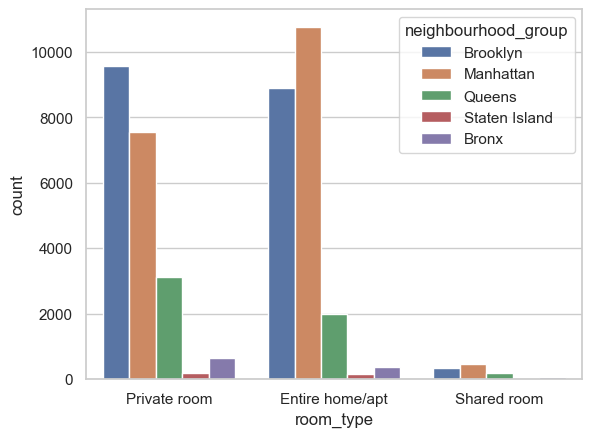

In [77]:
#análisis categorigo-categorico
#usamos histogramas
#sns.countplot(data=df,x="room_type",hue="neighbourhood")
#necesitamos menos categorias para que sea legible la informacion
#por lo tanto usaremos otra columna
sns.countplot(data=df,x="room_type",hue="neighbourhood_group")
plt.show()

In [78]:
#podemos crearemos columna que categoriza los precios por percentil
#df["percentil_price"]
#para el analisis categórico-numérico usaremos un heatmap
#queremos volver numerica una columna categorica
df["room_type"] = pd.factorize(df["room_type"])[0]
#lo hacemos con las demás
df["neighbourhood_group"] = pd.factorize(df["neighbourhood_group"])[0]
df["neighbourhood"] = pd.factorize(df["neighbourhood"])[0]
df.head()

,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,John,0,0,40.64749,-73.97237,0,149,1,9,6,365
1,Jennifer,1,1,40.75362,-73.98377,1,225,1,45,2,355
2,Elisabeth,1,2,40.80902,-73.94190,0,150,3,0,1,365
3,LisaRoxanne,0,3,40.68514,-73.95976,1,89,1,270,1,194
4,Laura,1,4,40.79851,-73.94399,1,80,10,9,1,0


<Axes: >

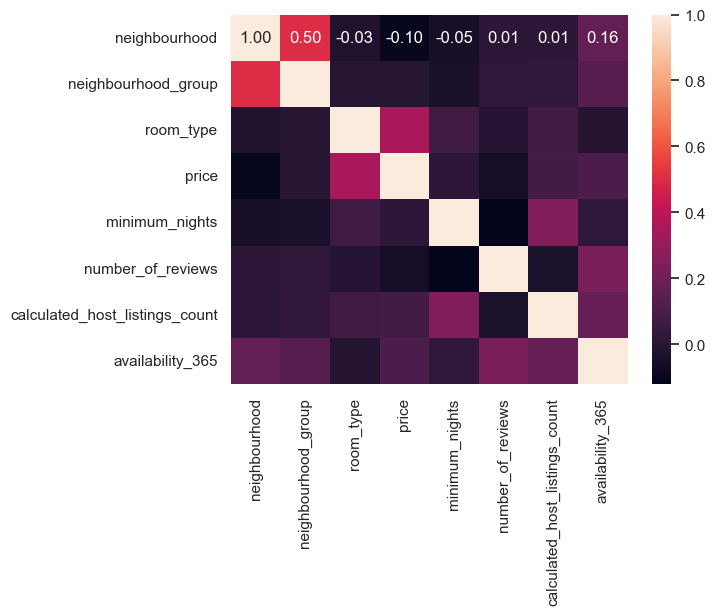

In [79]:
sns.heatmap(df[["neighbourhood","neighbourhood_group","room_type","price","minimum_nights","number_of_reviews","calculated_host_listings_count","availability_365"]].corr(),annot=True,fmt='.2f')

c:\Users\grazi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\grazi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\grazi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\grazi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

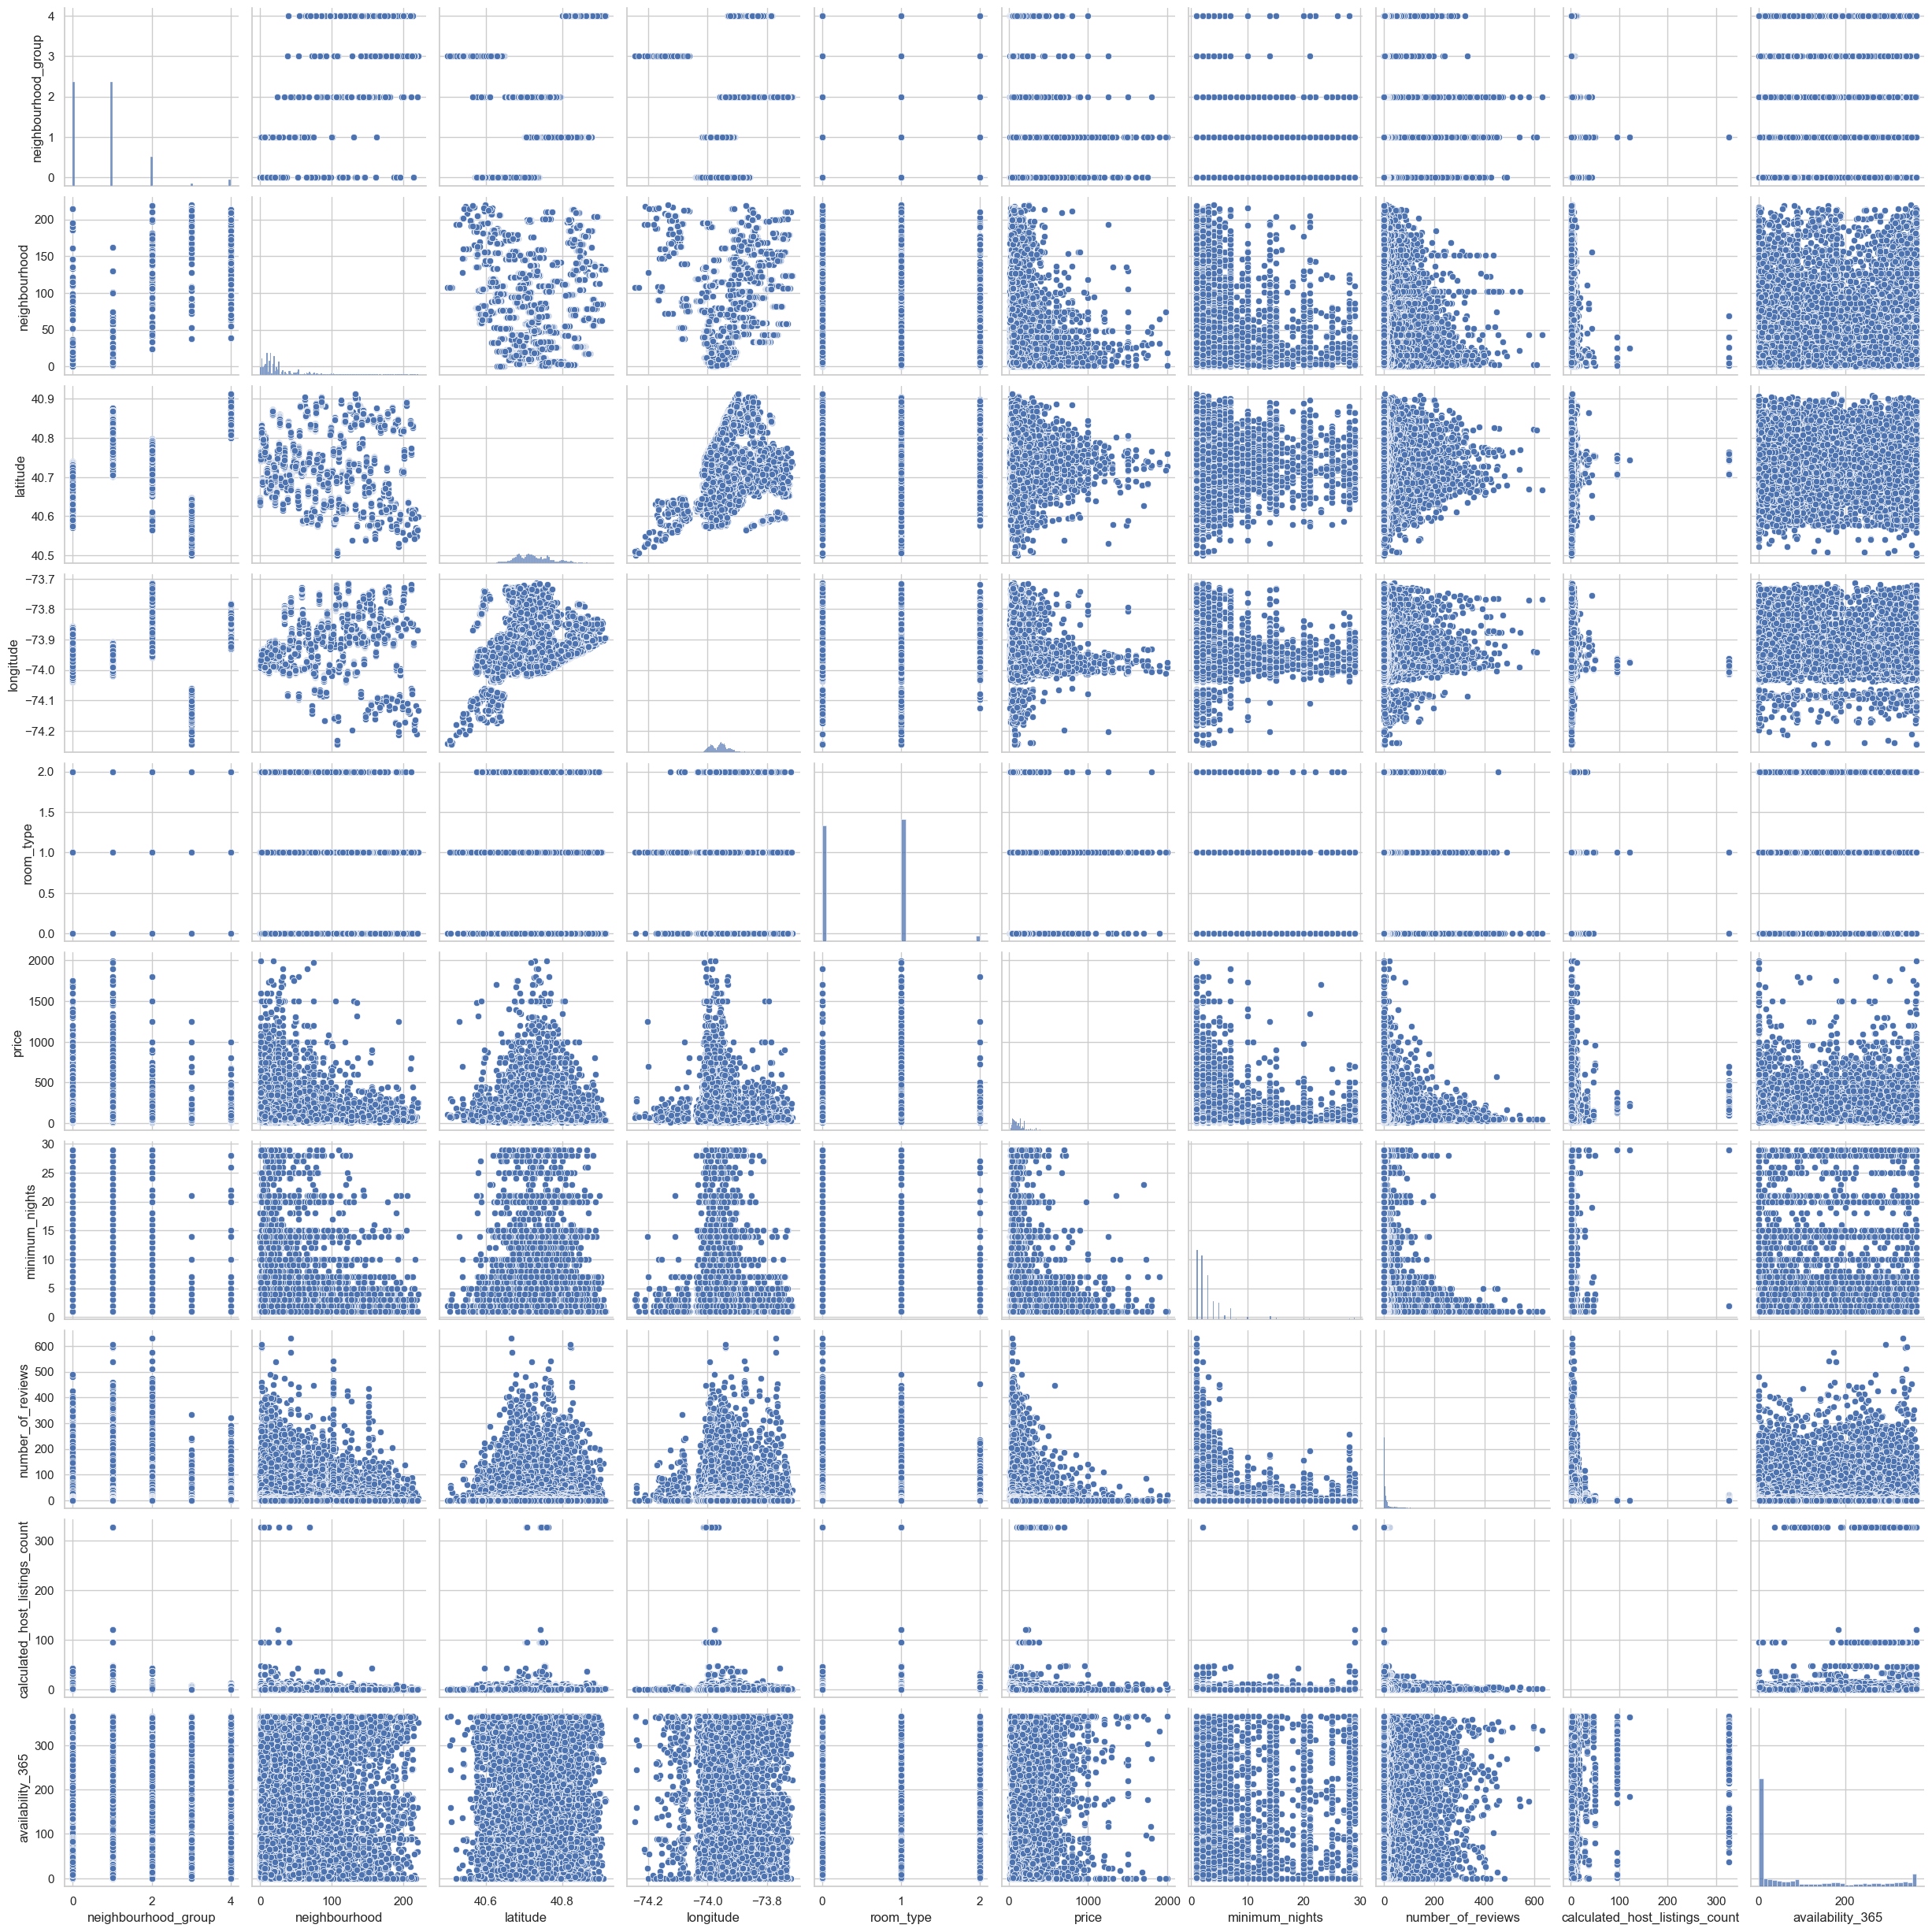

In [80]:
sns.pairplot(data=df)

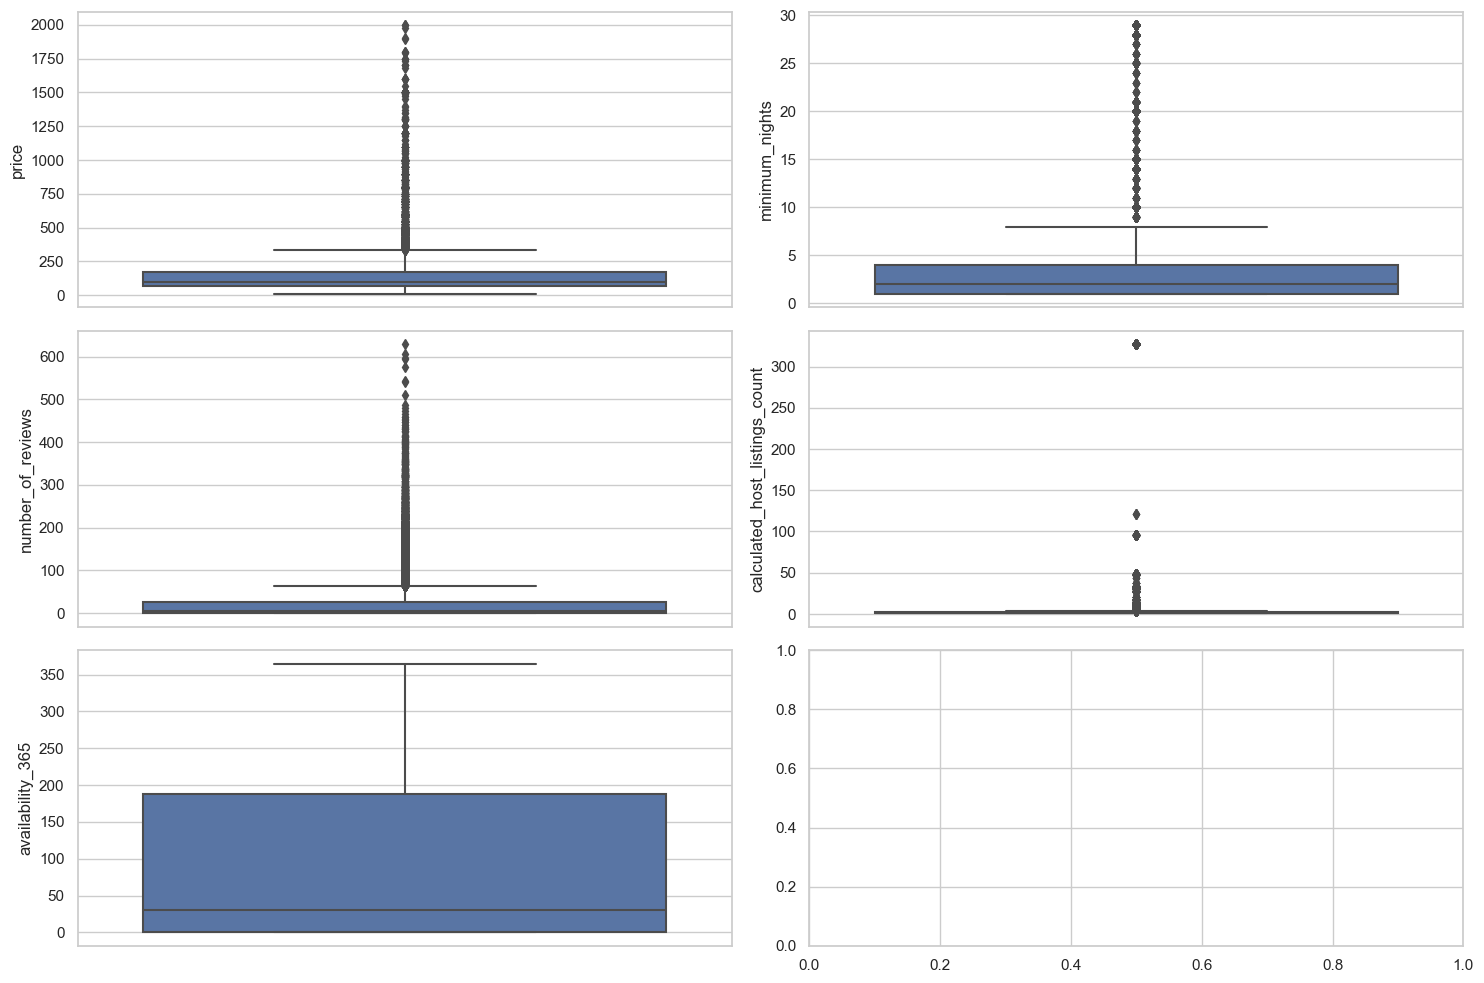

In [81]:
#revisaremos outliers usando boxplots
fig, axis = plt.subplots(3, 2, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = df, y = "price")
sns.boxplot(ax = axis[0, 1], data = df, y = "minimum_nights")
sns.boxplot(ax = axis[1, 0], data = df, y = "number_of_reviews")
sns.boxplot(ax = axis[1, 1], data = df, y = "calculated_host_listings_count")
sns.boxplot(ax = axis[2, 0], data = df, y = "availability_365")

plt.tight_layout()
plt.show()



In [17]:
#se podría incluso limitar mas el df dejando solo los minimum_nights hasta 1 semana
#df = df[df["minimum_nights"]<=7]


In [82]:
#revisamos los valores faltantes
df.isnull().sum().sort_values(ascending=False)


host_name                         20
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [83]:
#escalamos las variables para que una característica no pese más que otra solo por el tipo de dato
from sklearn.preprocessing import MinMaxScaler

variables = ["neighbourhood_group", "neighbourhood","price","room_type","minimum_nights","number_of_reviews","calculated_host_listings_count","availability_365"]

scaler = MinMaxScaler()
variables_escaladar = scaler.fit_transform(df[variables])
df_escalado = pd.DataFrame(variables_escaladar,index=df.index,columns=variables)
df_escalado["price"] = df["price"]
df_escalado.head()

,neighbourhood_group,neighbourhood,price,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,0.00,0.000000,149,0.0,0.000000,0.014308,0.015337,1.000000
1,0.25,0.004545,225,0.5,0.000000,0.071542,0.003067,0.972603
2,0.25,0.009091,150,0.0,0.071429,0.000000,0.000000,1.000000
3,0.00,0.013636,89,0.5,0.000000,0.429253,0.000000,0.531507
4,0.25,0.018182,80,0.5,0.321429,0.014308,0.000000,0.000000


In [84]:
#seleccion de caracteristicas.
#primero separamos la data en train y test

from sklearn.feature_selection import chi2,SelectKBest
from sklearn.model_selection import train_test_split
X= df_escalado.drop("price", axis=1)
y= df_escalado["price"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

seleccion = SelectKBest(chi2,k=4)
seleccion.fit(X_train,y_train)
ix = seleccion.get_support()
X_train_sel = pd.DataFrame(seleccion.transform(X_train),columns=X_train.columns.values[ix])
X_test_sel = pd.DataFrame(seleccion.transform(X_test),columns=X_test.columns.values[ix])

X_train_sel.head()

,room_type,minimum_nights,calculated_host_listings_count,availability_365
0,0.0,0.178571,0.000000,0.920548
1,0.5,0.214286,0.003067,0.830137
2,0.0,0.892857,0.006135,0.268493
3,0.5,0.392857,0.000000,0.087671
4,0.5,0.000000,0.000000,0.000000


In [85]:
X_test_sel['price'] = list(y_test)
X_train_sel["price"] = list(y_train)
X_test_sel.to_csv("../data/processed/clean_test.csv",index=False)
X_train_sel.to_csv("../data/processed/clean_train.csv",index=False)